In [1]:
%pylab inline
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import scipy.misc
from collections import Counter
from sklearn.decomposition import PCA
from scipy import ndimage

def KMeans(K,X):
    d,N = X.shape
    change = True
    R = X[:,np.random.randint(0,N,K)]
    M = np.zeros((N, K))
    while change:
        dists = -2 * ( X.T @ R) + np.sum(R ** 2, axis=0, keepdims=True)
        m = np.argmin(dists, axis =1)
        M2 = np.take(np.eye(K), m, axis=0).astype(int)
        change = not np.array_equal(M,M2)
        M = M2
        R = np.dot(X,M)/np.maximum(np.sum(M.T,axis=1),1)
    return R, m
    

Populating the interactive namespace from numpy and matplotlib


In [2]:

import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np
from scipy import signal

# A hepler function for displaying images within the notebook.
# It displays an image, optionally applies zoom the image.
def show_image(img, zoom=1.5):
    dpi = 77
    plt.figure(figsize=(img.shape[0]*zoom/dpi,img.shape[0]*zoom/dpi))
    if len(img.shape) == 2:
        img = np.repeat(img[:,:,np.newaxis],3,2)        
    plt.imshow(img, interpolation='nearest')
    

# A hepler function for displaying images within the notebook.
# It may display multiple images side by side, optionally apply gamma transform, and zoom the image.
def show_images(imglist, zoom=1, needs_encoding=False):
    if type(imglist) is not list:
       imglist = [imglist]
    n = len(imglist)
    first_img = imglist[0]
    dpi = 77 # pyplot default?
    plt.figure(figsize=(first_img.shape[0]*zoom*n/dpi,first_img.shape[0]*zoom*n/dpi))
    for i in range(0,n):
        img = imglist[i]
        plt.subplot(1,n,i + 1)
        plt.tight_layout()    
        plt.axis('off')
        if len(img.shape) == 2:
           img = np.repeat(img[:,:,np.newaxis],3,2)
        plt.imshow(img, interpolation='nearest')    
    

/home/michal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
/home/michal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  # This is added back by InteractiveShellApp.init_path()
/home/michal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  app.launch_new_instance()
/home/michal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


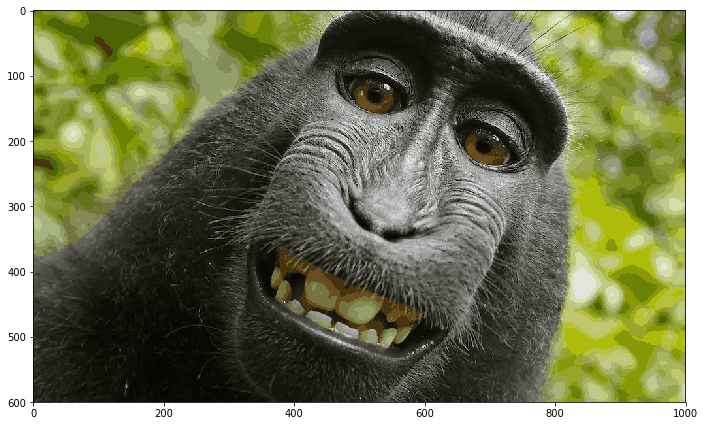

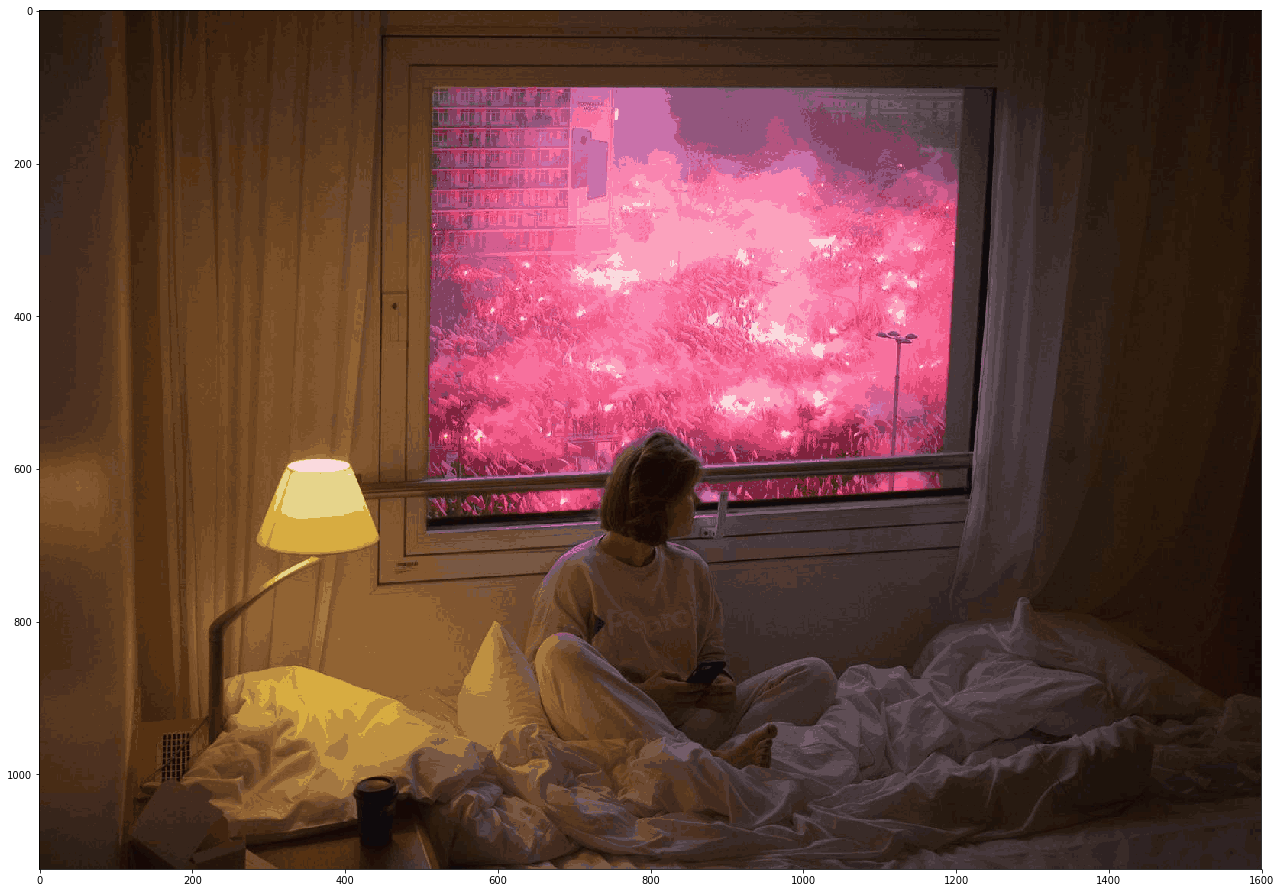

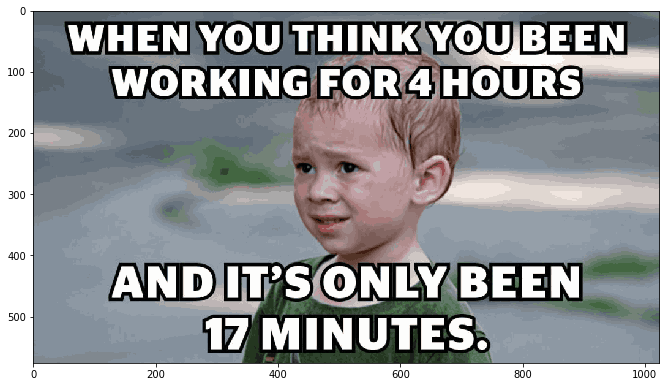

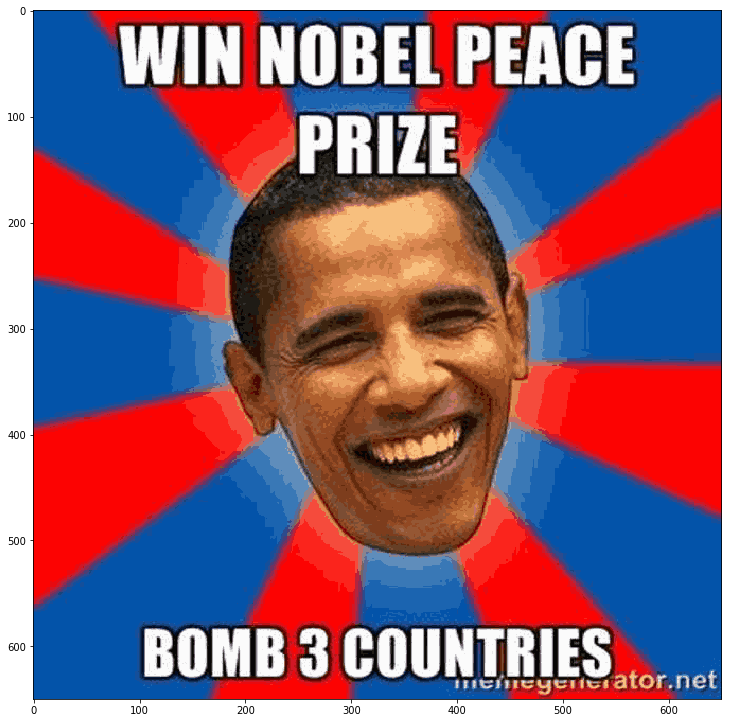

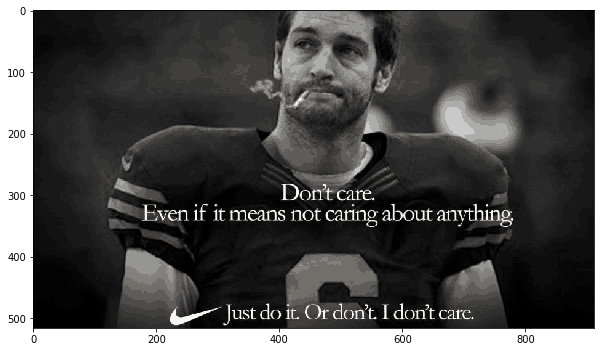

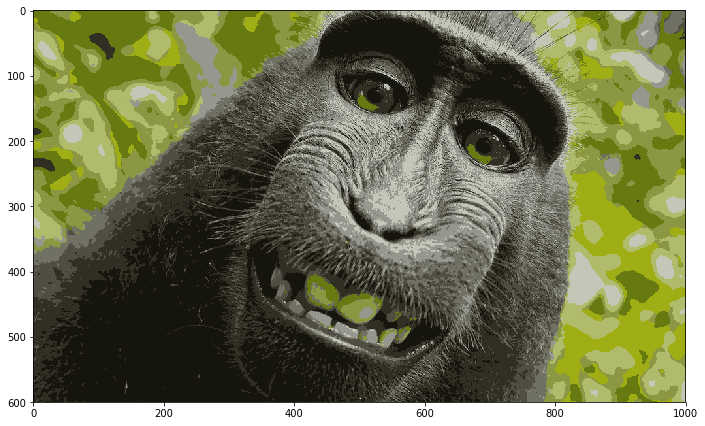

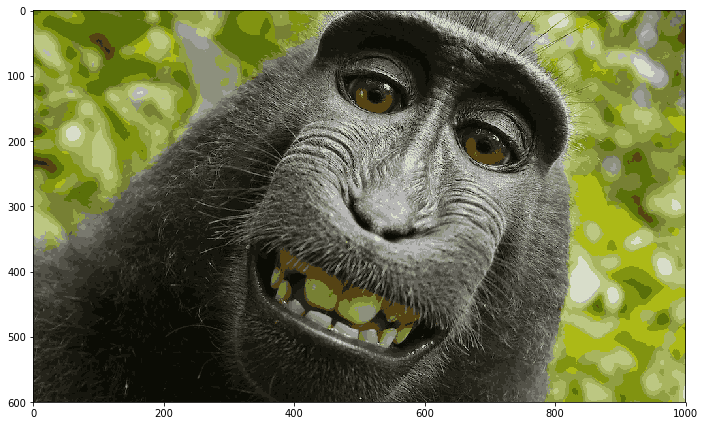

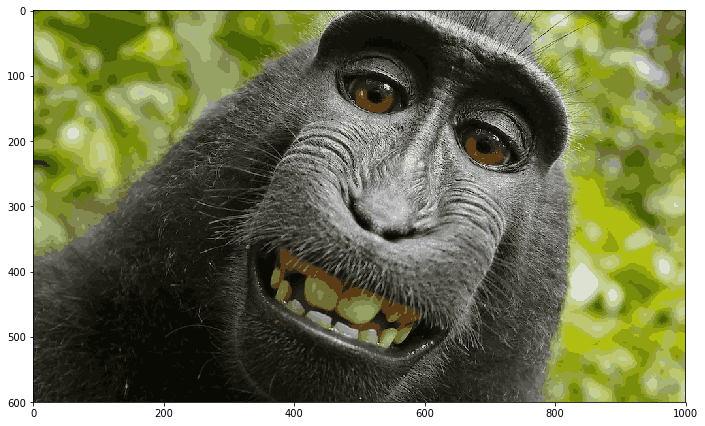

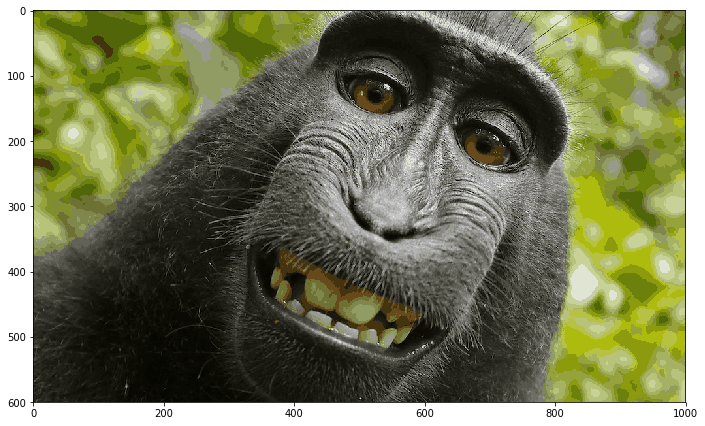

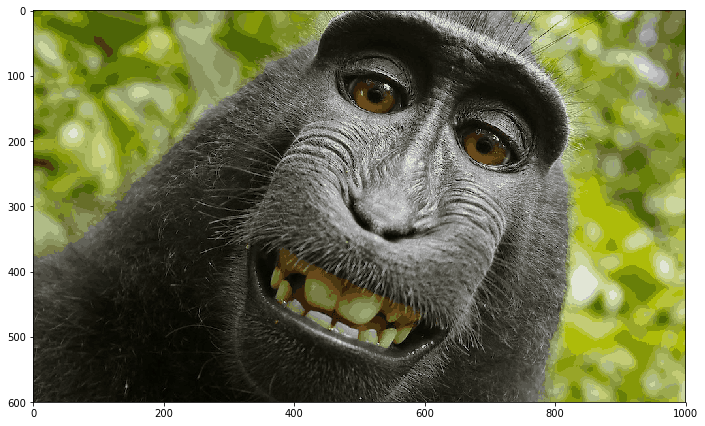

In [3]:
for i in range(1,6):
    pic = f"pics/original/{i}.jpg"
    K=50
    img=ndimage.imread(pic)
    y, x, _ = img.shape
    img = img.reshape(x*y, 3)
    R, m = KMeans(K, img.T)
    M = np.take(np.eye(K), m, axis=0).astype(int)
    img2 = (M @R.T).astype('int').reshape(y, x, 3)
    show_image(img2)
    scipy.misc.imsave(f'pics/results/{i}.jpg', img2)
    
for i in range(10, 60, 10):
    pic = f"pics/original/1.jpg"
    K=i
    img=ndimage.imread(pic)
    y, x, _ = img.shape
    img = img.reshape(x*y, 3)
    R, m = KMeans(K, img.T)
    M = np.take(np.eye(K), m, axis=0).astype(int)
    img2 = (M @R.T).astype('int').reshape(y, x, 3)
    show_image(img2)
    scipy.misc.imsave(f'pics/results/1-{i}.jpg', img2)